#### This short notebook shows you how you can see how your own images are processed

Imports and adding /src to current PATH

In [1]:
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import numpy as np
%matplotlib inline

module_path = os.path.abspath(
    os.path.join(os.path.abspath('.'), '../src'))
sys.path.insert(0, module_path)

Now we can import form /src:

In [2]:
from sudoku import Sudoku

Now we can load any sudoku image you may have lying around:

In [4]:
FILE_NAME = '1.jpg'  # CHANGE THIS

sudoku = Sudoku(FILE_NAME, save_steps=True)
sudoku.process()
sudoku.predict()


OSError: No file or directory found at c:\Users\dell\Downloads\chicago cirmes project\sudoku-scanner-master\models\modelv2.h5

In [ ]:
img = cv2.imread(FILE_NAME)

plt.imshow(img)
plt.title('Soduko Picture before solving it ')
plt.show()

In [ ]:
Sudoku_nums = sudoku.get_predictions()
Sudoku_nums = np.array_split(Sudoku_nums, len(Sudoku_nums)**0.5 )

lis = []
for i in Sudoku_nums:
    for j in i:
        lis.append(j)
    #print(i)

Sudoku_nums


[array([0, 0, 0, 6, 0, 4, 7, 0, 0]),
 array([7, 0, 6, 0, 0, 0, 0, 0, 9]),
 array([0, 0, 0, 0, 0, 5, 0, 8, 0]),
 array([0, 7, 0, 0, 2, 0, 0, 9, 3]),
 array([8, 0, 0, 0, 0, 0, 0, 0, 5]),
 array([4, 3, 0, 0, 1, 0, 0, 7, 0]),
 array([0, 5, 0, 2, 0, 0, 0, 0, 0]),
 array([3, 0, 0, 0, 0, 0, 2, 0, 8]),
 array([0, 0, 2, 3, 0, 1, 0, 0, 0])]

In [ ]:
FOLDER_NAME = 'images'  # CHANGE THIS (make sure the directory already exists)

for i, step in enumerate(sudoku.steps):
    filename = f'{FOLDER_NAME}/step{i}.jpg'
    img = cv2.imwrite(filename, step)


Steps shown below

In [ ]:
img = cv2.imread('images/step0.jpg')

plt.imshow(img)
plt.title('Step 0 ')
plt.show()

In [ ]:
img = cv2.imread('images/step1.jpg')

plt.imshow(img)
plt.title('Step 1 ')
plt.show()

In [ ]:
img = cv2.imread('images/step2.jpg')

plt.imshow(img)
plt.title('Step 2 ')
plt.show()

In [ ]:
img = cv2.imread('images/step3.jpg')

plt.imshow(img)
plt.title('Step 3 ')
plt.show()

# Solve Sudoku

In [ ]:

# A Backtracking program in Python to solve Sudoku problem 

def print_grid(arr): 
	for i in range(9): 
		for j in range(9): 
			print (arr[i][j])
		print ('\n') 


def find_empty_location(arr,l): 
	for row in range(9): 
		for col in range(9): 
			if(arr[row][col]==0): 
				l[0]=row 
				l[1]=col 
				return True
	return False
# Returns a boolean which indicates whether any assigned entry 
# in the specified row matches the given number. 

def used_in_row(arr,row,num): 
	for i in range(9): 
		if(arr[row][i] == num): 
			return True
	return False
# Returns a boolean which indicates whether any assigned entry 
# in the specified column matches the given number. 

def used_in_col(arr,col,num): 
	for i in range(9): 
		if(arr[i][col] == num): 
			return True
	return False

# Returns a boolean which indicates whether any assigned entry 
# within the specified 3x3 box matches the given number
def used_in_box(arr,row,col,num): 
	for i in range(3): 
		for j in range(3): 
			if(arr[i+row][j+col] == num): 
				return True
	return False

# Checks whether it will be legal to assign num to the given row,col 
def check_location_is_safe(arr,row,col,num): 
	
	# Check if 'num' is not already placed in current row, 
	# current column and current 3x3 box 
	return not used_in_row(arr,row,num) and not used_in_col(arr,col,num) and not used_in_box(arr,row - row%3,col - col%3,num) 

# Takes a partially filled-in grid and attempts to assign values to 
# all unassigned locations in such a way to meet the requirements 
# for Sudoku solution (non-duplication across rows, columns, and boxes) 
def solve_sudoku(arr): 
	
	# 'l' is a list variable that keeps the record of row and col in find_empty_location Function	 
	l=[0,0] 
	
	# If there is no unassigned location, we are done	
	if(not find_empty_location(arr,l)): 
		return True
		
  
  # Assigning list values to row and col that we got from the above Function 

	
	row=l[0] 
	col=l[1] 
	
	# consider digits 1 to 9 
	for num in range(1,10): 
		
	 
		if(check_location_is_safe(arr,row,col,num)): 
			
			# make tentative assignment 
			arr[row][col]=num 

		 
			if(solve_sudoku(arr)): 
				return True

			
			arr[row][col] = 0
			
	# this triggers backtracking		 
	return False



# Driver main function to test above functions 
def sudoku_solver(grid):
	if(solve_sudoku(grid)):
		print('---') 
	else:
		print ("No solution exists")
	
	return grid


ss = sudoku_solver(Sudoku_nums)
ss

---


[array([5, 8, 3, 6, 9, 4, 7, 2, 1]),
 array([7, 1, 6, 8, 3, 2, 5, 4, 9]),
 array([2, 9, 4, 1, 7, 5, 3, 8, 6]),
 array([6, 7, 1, 5, 2, 8, 4, 9, 3]),
 array([8, 2, 9, 7, 4, 3, 1, 6, 5]),
 array([4, 3, 5, 9, 1, 6, 8, 7, 2]),
 array([1, 5, 8, 2, 6, 7, 9, 3, 4]),
 array([3, 6, 7, 4, 5, 9, 2, 1, 8]),
 array([9, 4, 2, 3, 8, 1, 6, 5, 7])]

And now to save these to your preferred location:

In [ ]:
ss_lis = []
for i in ss:
    for j in i:
        ss_lis.append(j)
    #print(i)

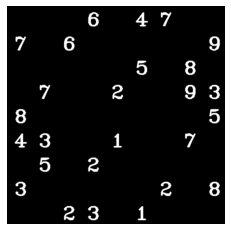

In [ ]:
def displayNumbers(img,numbers,color = (0,255,0)):
    secW = int(img.shape[1]/9)
    secH = int(img.shape[0]/9)
    for x in range (0,9):
        for y in range (0,9):
            if numbers[(y*9)+x] != 0 :
                 cv2.putText(img, str(numbers[(y*9)+x]),
                               (x*secW+int(secW/2)-10, int((y+0.8)*secH)), cv2.FONT_HERSHEY_COMPLEX_SMALL,
                            2, color, 2, cv2.LINE_AA)
    return img

img = cv2.imread(FILE_NAME)   
#plt.imshow(img)
heightImg = 450
widthImg = 450
imgBlank = np.zeros((heightImg, widthImg, 3), np.uint8)
new = imgBlank.copy()

new = displayNumbers(new, lis, color=(255, 255, 255))
plt.axis("off")
plt.imshow(new);

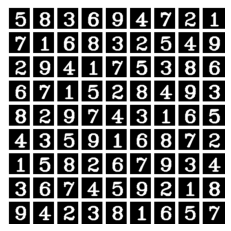

In [ ]:
def drawGrid(img):
    secW = int(img.shape[1]/9)
    secH = int(img.shape[0]/9)
    for i in range (0,9):
        pt1 = (0,secH*i)
        pt2 = (img.shape[1],secH*i)
        pt3 = (secW * i, 0)
        pt4 = (secW*i,img.shape[0])
        cv2.line(img, pt1, pt2, (255, 255, 255),5)
        cv2.line(img, pt3, pt4, (255, 255, 255),5)
    return img

nn = displayNumbers(new, ss_lis, color=(255, 255, 255))
nn = drawGrid(nn)
plt.axis("off")
plt.imshow(nn);